In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
calibration = pd.read_csv('./Calibration/Cernox_calibration.dat',header=0,skiprows=34)

In [23]:
calibration.head()

,Comment,Time Stamp (sec),Status (code),Temperature (K),Magnetic Field (Oe),Sample Position (degrees),Bridge 1 Resistivity (Ohm),Bridge 1 Excitation (uA),Bridge 2 Resistivity (Ohm-m),Bridge 2 Excitation (uA),...,Bridge 4 Excitation (uA),Bridge 1 Std. Dev. (Ohm),Bridge 2 Std. Dev. (Ohm-m),Bridge 3 Std. Dev. (Ohm-m),Bridge 4 Std. Dev. (Ohm-m),Number of Readings,Bridge 1 Resistance (Ohms),Bridge 2 Resistance (Ohms),Bridge 3 Resistance (Ohms),Bridge 4 Resistance (Ohms)
0,NaN,2.751439e+07,NaN,300.001298,-0.145506,0,81.063574,1.999906,NaN,NaN,...,NaN,0.007272,NaN,NaN,NaN,25,81.063574,NaN,NaN,NaN
1,NaN,2.751469e+07,NaN,278.927168,-0.398876,0,86.087505,1.999906,NaN,NaN,...,NaN,0.006617,NaN,NaN,NaN,25,86.087505,NaN,NaN,NaN
2,NaN,2.751495e+07,NaN,259.253230,-0.508186,0,91.583473,1.999906,NaN,NaN,...,NaN,0.009336,NaN,NaN,NaN,25,91.583473,NaN,NaN,NaN
3,NaN,2.751521e+07,NaN,240.968285,-0.405391,0,97.476595,1.999906,NaN,NaN,...,NaN,0.010054,NaN,NaN,NaN,25,97.476595,NaN,NaN,NaN
4,NaN,2.751546e+07,NaN,223.967147,-0.268571,0,103.796452,1.999906,NaN,NaN,...,NaN,0.006514,NaN,NaN,NaN,25,103.796452,NaN,NaN,NaN


In [25]:
cernox_T = calibration['Temperature (K)']
cernox_R = calibration['Bridge 1 Resistivity (Ohm)']

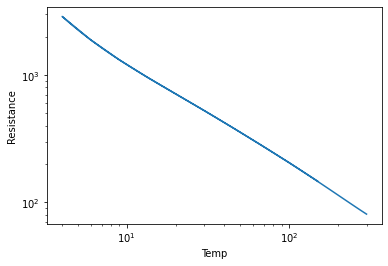

81.06357360839841 2876.7265136718797


In [47]:
plt.plot(cernox_T,cernox_R)
plt.xlabel('Temp')
plt.ylabel("Resistance")
plt.yscale('log')
plt.xscale('log')
plt.show()
print(min(cernox_R),max(cernox_R))

In [70]:
def poly(x,poly):
    ans = 0
    for n, a in enumerate(poly):
        ans += a * x ** n
    return ans

poly_fit_HighTemp = [2.266093970179639e+03,-74.679741502403559,1.306792649962983,-0.014094956469091,9.945749933401484e-05,-4.688871397124473e-07,1.466123461743109e-09,-2.920818817154983e-12,3.357507675208470e-15,-1.695097455234765e-18] #a,b,c,d of polynom
poly_fit_MedTemp = [3.847885862700156e+02,-2.857599908816134,0.011208582325180,-2.682987830440934e-05,4.071137070332167e-08,-3.857907847124153e-11,2.087523622701420e-14,-4.426803462142916e-18,-9.650337680202309e-22,4.910997020133234e-25]
poly_fit_LowTemp = [1.474961505714320e+02,-0.514009200082837,9.478152337631471e-04,-1.095475294340138e-06,8.431608728251271e-10,-4.398065114076154e-13,1.538071005155538e-16,-3.455037124618886e-20,4.505799905786075e-24,-2.592838468122653e-28]

poly_high_limits = (0,326.48) #Ohms
poly_med_limits = (307.17, 1044.19)  # Ohms
poly_low_limits = (835.894, 3000)  # Ohms

def getTemp(voltage):
    #assuming 10 uA - as calibration
    if voltage > poly_low_limits[0] * 10**-5:
        return poly(voltage*(10**5), poly_fit_LowTemp)
    elif voltage > poly_med_limits[0] * 10**-5:
        return poly(voltage * (10 ** 5), poly_fit_MedTemp)
    else:
        return poly(voltage * (10 ** 5), poly_fit_HighTemp)

In [86]:
R = np.linspace(81.1,2876,5000)
V = R * 10**-5
T_calc = np.zeros(V.shape)
for (i,_V) in enumerate(V):
    T_calc[i] = getTemp(_V)

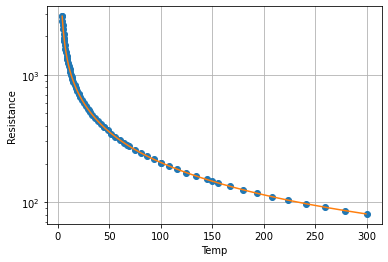

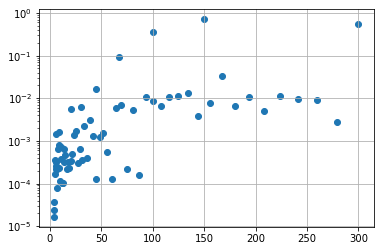

In [89]:
plt.plot(cernox_T,cernox_R,'o')
plt.plot(T_calc,R)
plt.xlabel('Temp')
plt.ylabel("Resistance")
plt.yscale('log')
plt.grid()
plt.scatter(cernox_T,abs(cernox_T-np.interp(cernox_R,R,T_calc)))
plt.yscale('log')
plt.grid()
plt.show()